In [214]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans

In [370]:
data = pd.read_excel('Spotify Charts.xlsx')

In [3]:
data.columns

Index(['Unnamed: 0', 'wrapperType', 'kind', 'collectionId', 'trackId',
       'artistName', 'collectionName', 'collectionCensoredName',
       'trackCensoredName', 'collectionViewUrl', 'feedUrl', 'trackViewUrl',
       'artworkUrl30', 'artworkUrl60', 'artworkUrl100', 'collectionPrice',
       'trackPrice', 'trackRentalPrice', 'collectionHdPrice', 'trackHdPrice',
       'trackHdRentalPrice', 'releaseDate', 'collectionExplicitness',
       'trackExplicitness', 'trackCount', 'country', 'currency',
       'contentAdvisoryRating', 'artworkUrl600', 'artistId', 'artistViewUrl',
       'primaryGenreName', 'Secondary Genre', 'Origin', 'Theme', 'trackName',
       'Description', 'Average Duration', 'Rank'],
      dtype='object')

In [332]:
data = data.drop(['Unnamed: 0', 'wrapperType', 'kind',  'trackId', 'trackName','collectionCensoredName',
       'trackCensoredName', 'collectionViewUrl', 'feedUrl', 'trackViewUrl',
       'artworkUrl30', 'artworkUrl60', 'artworkUrl100', 'collectionPrice',
       'trackPrice', 'trackRentalPrice', 'collectionHdPrice', 'trackHdPrice',
       'trackHdRentalPrice', 'trackExplicitness', 'country', 'currency', 'artworkUrl600',
       'artistId', 'artistViewUrl',  'collectionExplicitness', 'releaseDate'], axis=1)

In [333]:
data.shape

(86, 12)

In [371]:
data = data.rename(columns={'collectionId': 'ID', 'artistName': 'Artist Name', 'collectionName': 'Collection Name', 
                     'trackCount':'Tracks', 'contentAdvisoryRating': 'Advisory Rating', 'primaryGenreName': 'Genre',
                           'Average Duration': 'Average Duration in Mins'})

In [372]:
hehe = ['#1db954', '#0e0c11']

In [373]:
sns.set_palette(hehe)

sns.set(rc={'figure.figsize':(20,10)}, style='whitegrid', font_scale=1.5, palette='husl')

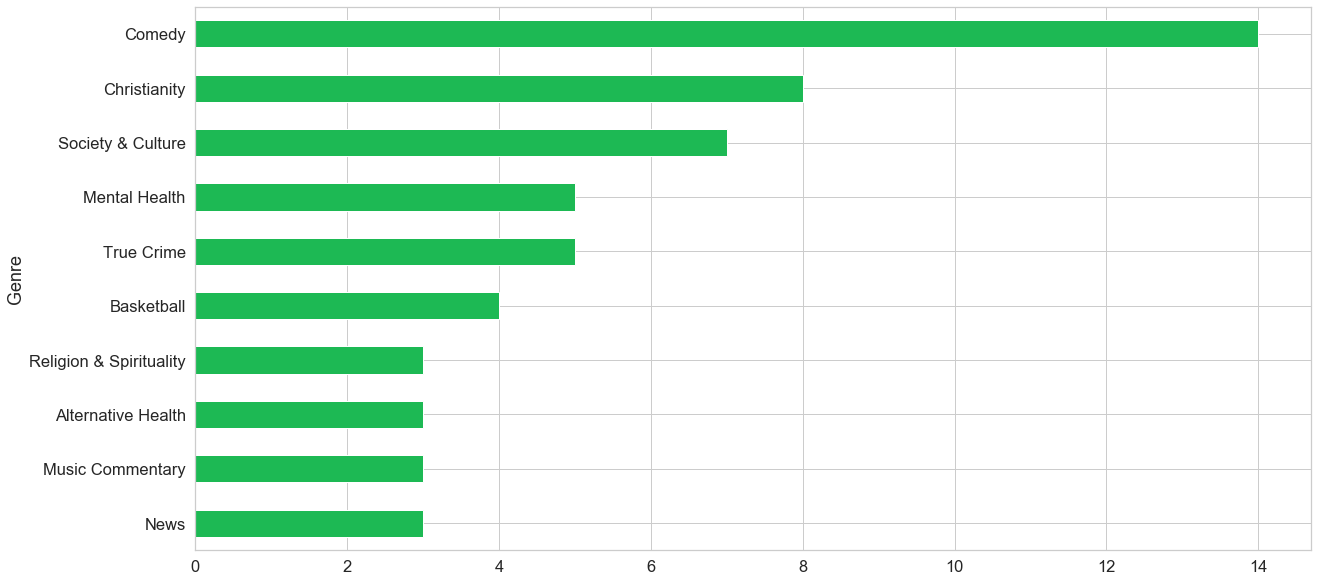

In [374]:
test = data.groupby(['Genre'])['Genre'].count()

test = test.sort_values(ascending=False)

test = test.head(10)

test = test.sort_values(ascending=True)

sns.set_palette(hehe)
 
test.plot(kind='barh', stacked=True, legend=False)

In [93]:
sns.set(rc={'figure.figsize':(30,25)}, style='whitegrid', font_scale=2.5, palette='husl')

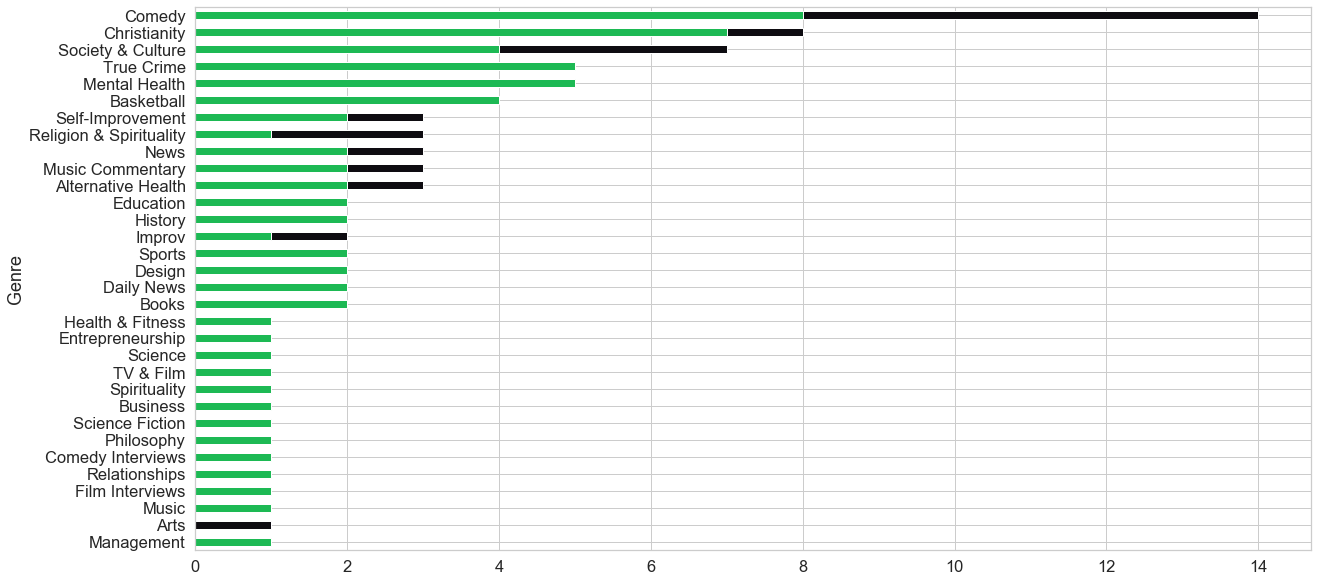

In [375]:
test = data.groupby(['Genre', 'Origin'])['Genre'].count().unstack('Origin').fillna(0)

test['Total'] = test['Local'] + test['Intl']

test = test.sort_values(by='Total', ascending=False)

test = test.sort_values(by='Total', ascending=True)


test = test[['Intl', 'Local']]

test.plot(kind='barh', stacked=True, legend=False)

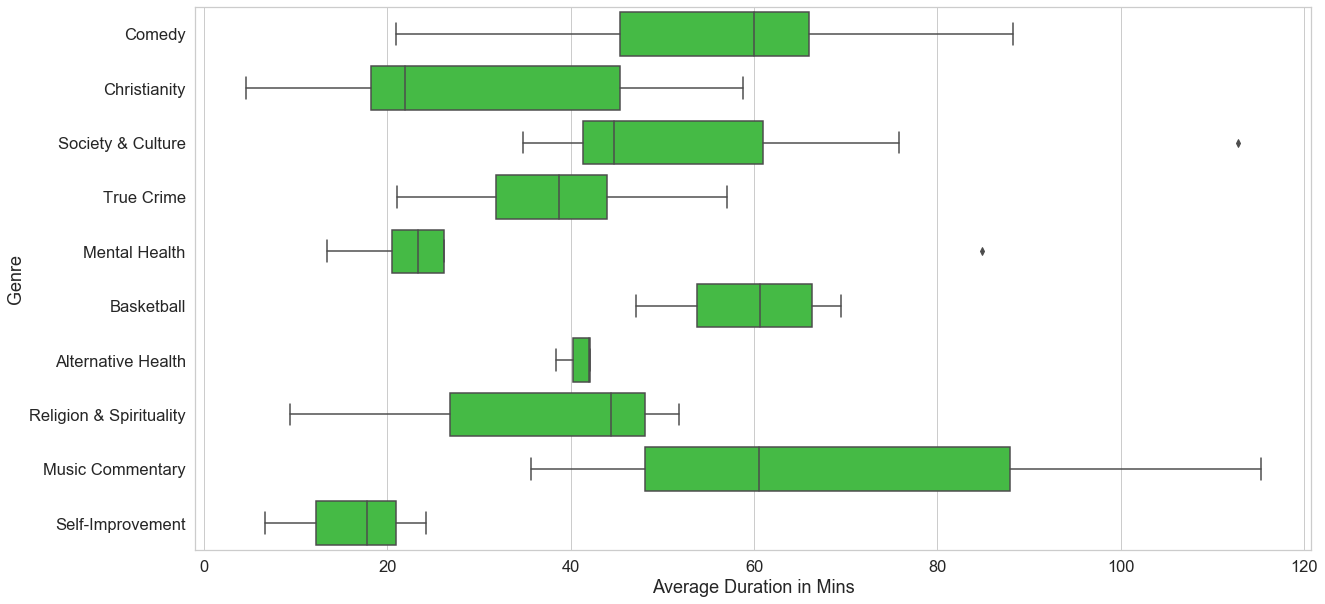

In [134]:


sns.boxplot(x='Average Duration in Mins', y='Genre', data=data, order = data['Genre'].value_counts().iloc[:10].index, color='limegreen')

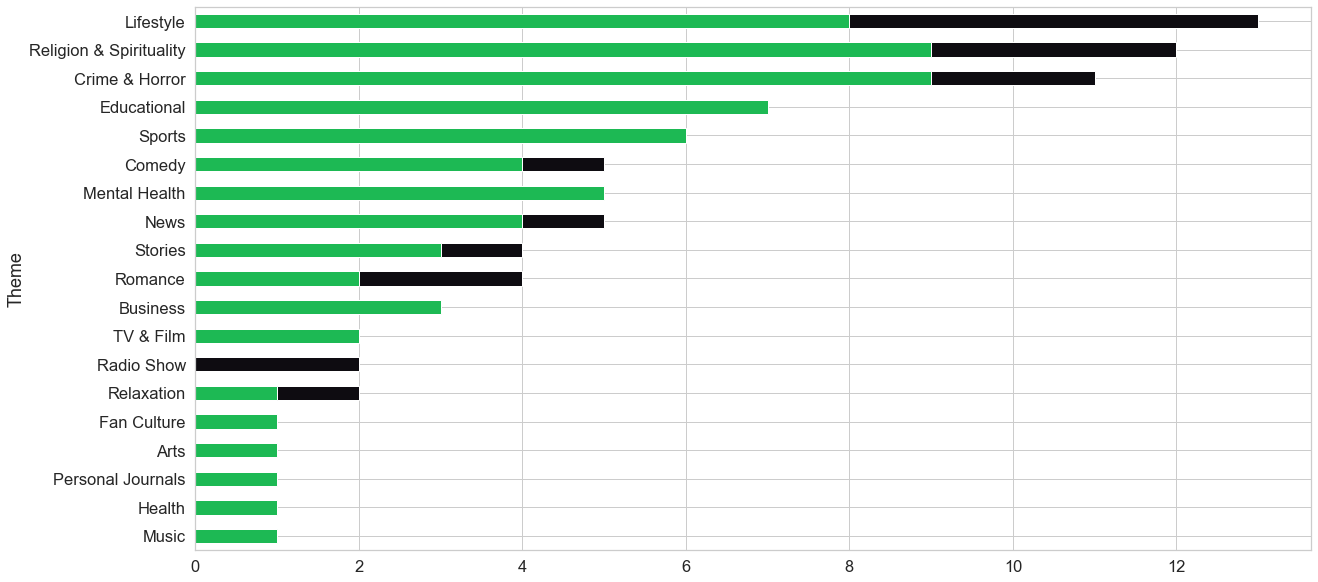

In [376]:
test = data.groupby(['Theme', 'Origin'])['Theme'].count().unstack('Origin').fillna(0)

test['Total'] = test['Local'] + test['Intl']

test = test.sort_values(by='Total', ascending=False)

test = test.sort_values(by='Total', ascending=True)

test = test[['Intl', 'Local']]

sns.set_palette(hehe)

test.plot(kind='barh', stacked=True, legend=False)

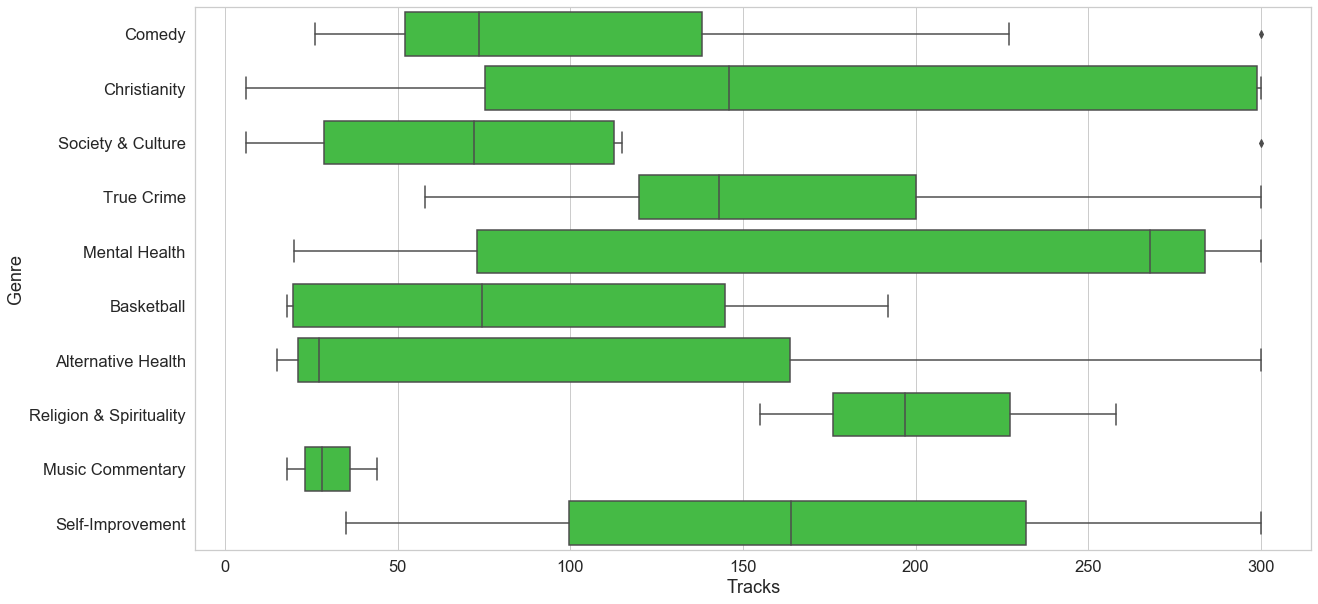

In [151]:
sns.boxplot(x='Tracks', y='Genre', color='limegreen', data=data, order = data['Genre'].value_counts().iloc[:10].index)


In [156]:
df_local = data[data['Origin'] == 'Local']
df_intl = data[data['Origin'] == 'Intl']

In [336]:
data.columns

Index(['ID', 'Artist Name', 'Collection Name', 'Tracks', 'Advisory Rating',
       'Genre', 'Secondary Genre', 'Origin', 'Theme', 'Description',
       'Average Duration in Mins', 'Rank'],
      dtype='object')

In [337]:
col = ['ID', 'Tracks', 'Advisory Rating', 'Genre', 'Origin', 'Theme', 'Average Duration in Mins', 'Rank']
df = data[col]

In [338]:
le = preprocessing.LabelEncoder()
le.fit(df['Genre'])
le.classes_
df['Transformed_Genre'] = le.transform((df['Genre']))
genre = dict(zip(le.transform(le.classes_), le.classes_))

C:\Users\Lhen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [339]:
le = preprocessing.LabelEncoder()
le.fit(df['Origin'])
le.classes_
df['Transformed_Origin'] = le.transform((df['Origin']))
origin = dict(zip(le.transform(le.classes_), le.classes_))

C:\Users\Lhen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [340]:
le = preprocessing.LabelEncoder()
le.fit(df['Theme'])
le.classes_
df['Transformed_Theme'] = le.transform((df['Theme']))
theme = dict(zip(le.transform(le.classes_), le.classes_))

C:\Users\Lhen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [341]:
dummy = pd.get_dummies(df['Advisory Rating'])
df['Transformed_Rating'] = dummy['Clean']

In [345]:
col = ['ID', 'Tracks', 'Average Duration in Mins', 'Transformed_Genre',
       'Transformed_Origin', 'Transformed_Rating', 'Rank']
df_dummified = df[col]

In [346]:
X = df_dummified

In [347]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters=5, random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [348]:
new_data.head()

,ID,Tracks,Average Duration in Mins,Transformed_Genre,Transformed_Origin,Transformed_Rating,Rank,labels
0,1459227062,63,32.177083,6,1,1,86,2
1,1387922676,26,88.245833,6,1,1,85,2
2,1439313975,35,24.220833,26,1,1,84,2
3,1455713016,115,112.822917,27,1,0,83,2
4,160904630,277,14.106250,9,0,1,82,1


In [349]:
podding = new_data

In [350]:
podding['Genre'] = podding['Transformed_Genre'].map(genre)
podding['Origin'] =  podding['Transformed_Origin'].map(origin)

In [351]:
podding

,ID,Tracks,Average Duration in Mins,Transformed_Genre,Transformed_Origin,Transformed_Rating,Rank,labels,Genre,Origin
0,1459227062,63,32.177083,6,1,1,86,2,Comedy,Local
1,1387922676,26,88.245833,6,1,1,85,2,Comedy,Local
2,1439313975,35,24.220833,26,1,1,84,2,Self-Improvement,Local
3,1455713016,115,112.822917,27,1,0,83,2,Society & Culture,Local
4,160904630,277,14.106250,9,0,1,82,1,Design,Intl
...,...,...,...,...,...,...,...,...,...,...
81,1483638752,18,65.266667,2,0,0,5,2,Basketball,Intl
82,1477350613,195,10.685417,5,0,1,4,2,Christianity,Intl
83,1393035987,51,23.693750,4,0,1,3,2,Business,Intl
84,151230264,300,24.550000,20,0,1,2,1,News,Intl


In [356]:
cluster_0 = podding[podding['labels'] == 0]
cluster_0.describe()

,ID,Tracks,Average Duration in Mins,Transformed_Genre,Transformed_Origin,Transformed_Rating,Rank,labels
count,1.200000e+01,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.0
mean,1.073013e+09,235.833333,52.037674,16.583333,0.0,0.583333,38.583333,0.0
std,5.983240e+07,78.731804,26.639065,10.457345,0.0,0.514929,20.065612,0.0
min,9.281597e+08,99.000000,20.729167,2.000000,0.0,0.000000,11.000000,0.0
25%,1.049593e+09,181.500000,31.915625,6.000000,0.0,0.000000,24.500000,0.0
50%,1.072132e+09,283.500000,53.066667,17.000000,0.0,1.000000,35.500000,0.0
75%,1.107483e+09,300.000000,61.950521,25.250000,0.0,1.000000,48.250000,0.0
max,1.166583e+09,300.000000,106.020833,31.000000,0.0,1.000000,75.000000,0.0


In [354]:
cluster_0['Origin'].value_counts()

Intl    12
Name: Origin, dtype: int64

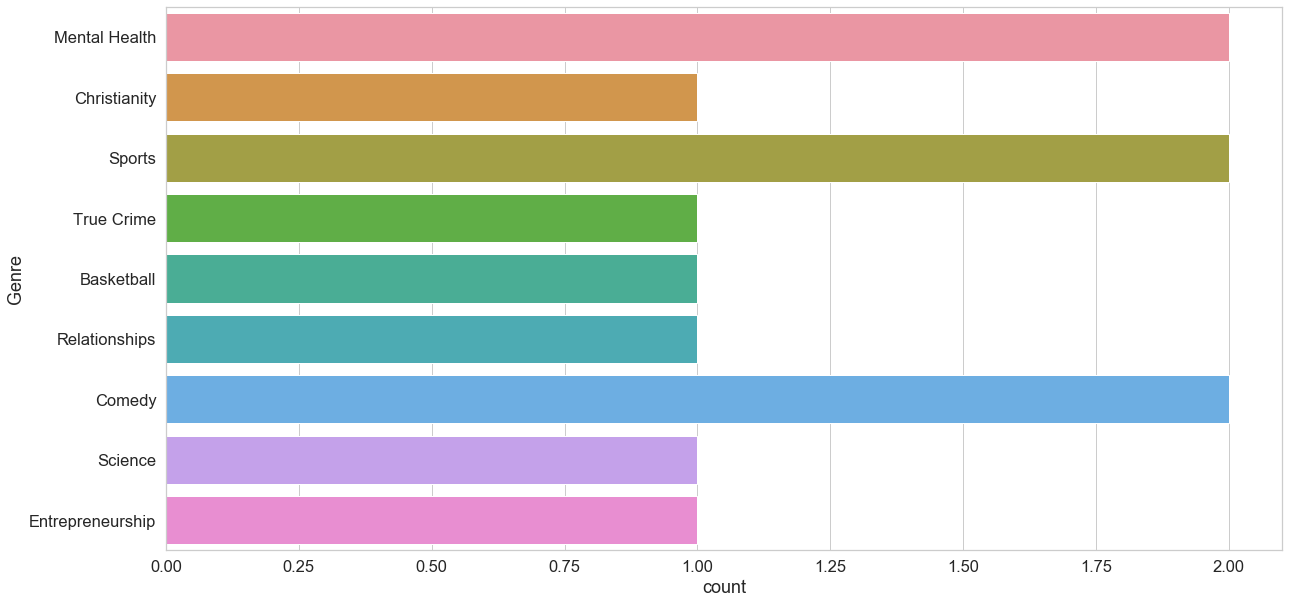

In [304]:
sns.countplot(y='Genre', data=cluster_0)

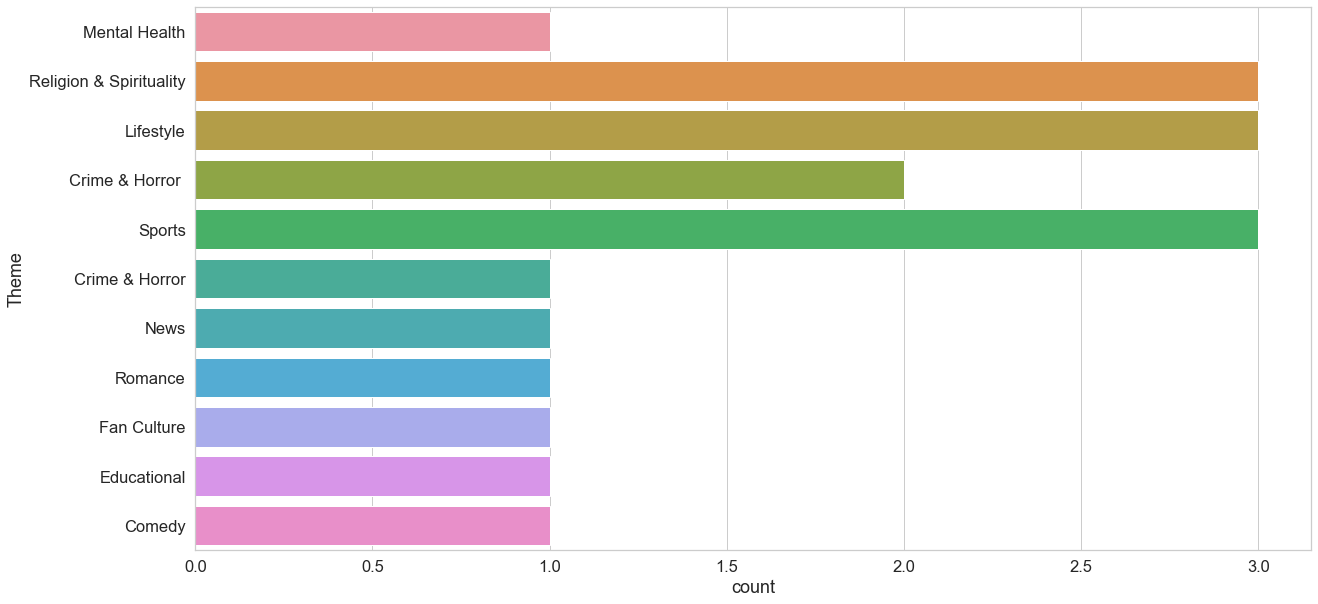

In [282]:
sns.countplot(y='Theme', data=cluster_0)

In [355]:
cluster_1 = podding[podding['labels'] == 1]
cluster_1.describe()

,ID,Tracks,Average Duration in Mins,Transformed_Genre,Transformed_Origin,Transformed_Rating,Rank,labels
count,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,2.813891e+08,224.777778,40.381250,13.888889,0.111111,0.888889,44.777778,1.0
std,1.365680e+08,107.837584,23.239924,9.047713,0.333333,0.333333,32.143342,0.0
min,1.350673e+08,53.000000,14.106250,5.000000,0.000000,0.000000,1.000000,1.0
25%,1.512303e+08,97.000000,24.550000,5.000000,0.000000,1.000000,9.000000,1.0
50%,2.789814e+08,299.000000,36.564583,9.000000,0.000000,1.000000,55.000000,1.0
75%,3.989642e+08,300.000000,43.658333,20.000000,0.000000,1.000000,65.000000,1.0
max,4.440831e+08,300.000000,91.147917,27.000000,1.000000,1.000000,82.000000,1.0


In [358]:
cluster_1['Transformed_Rating'].value_counts()

1    8
0    1
Name: Transformed_Rating, dtype: int64

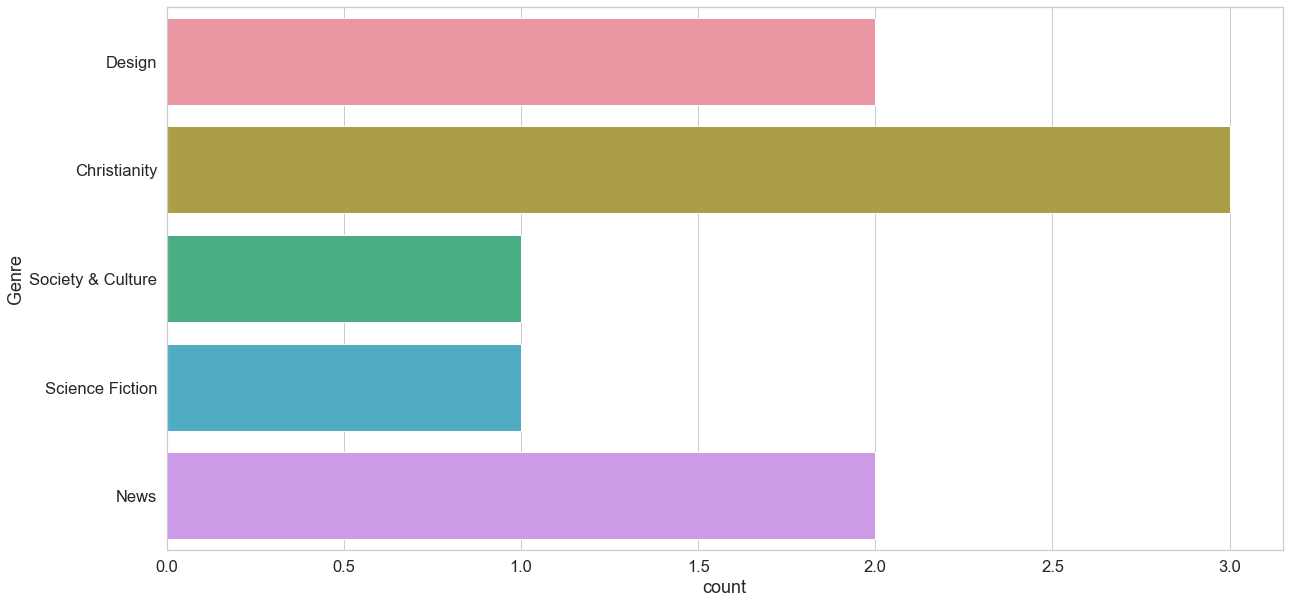

In [308]:
sns.countplot(y='Genre', data=cluster_1)

In [360]:
cluster_2 = podding[podding['labels'] == 2]
cluster_2.describe()

,ID,Tracks,Average Duration in Mins,Transformed_Genre,Transformed_Origin,Transformed_Rating,Rank,labels
count,4.400000e+01,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,1.452726e+09,77.545455,50.529119,13.000000,0.363636,0.704545,46.681818,2.0
std,2.850346e+07,73.054441,27.082404,9.152456,0.486607,0.461522,27.237775,0.0
min,1.387923e+09,4.000000,4.583333,0.000000,0.000000,0.000000,3.000000,2.0
25%,1.437801e+09,24.000000,34.113021,6.000000,0.000000,0.000000,23.750000,2.0
50%,1.457641e+09,56.000000,48.858333,11.000000,0.000000,1.000000,46.000000,2.0
75%,1.473810e+09,106.000000,65.369792,19.250000,1.000000,1.000000,72.250000,2.0
max,1.496690e+09,300.000000,115.258333,30.000000,1.000000,1.000000,86.000000,2.0


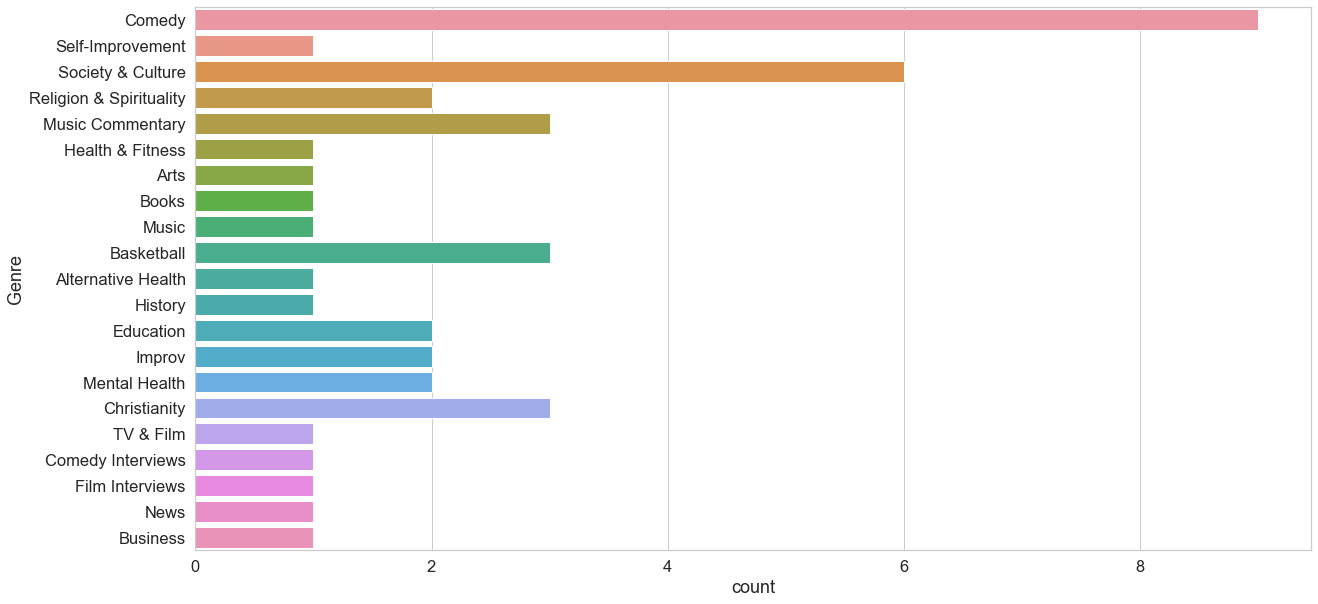

In [316]:
sns.countplot(y='Genre', data=cluster_2)

In [315]:
cluster_2['Transformed_Rating'].value_counts()

1    31
0    13
Name: Transformed_Rating, dtype: int64

In [361]:
cluster_3 = podding[podding['labels'] == 3]
cluster_3.describe()

,ID,Tracks,Average Duration in Mins,Transformed_Genre,Transformed_Origin,Transformed_Rating,Rank,labels
count,1.500000e+01,15.000000,15.000000,15.000000,15.0,15.000000,15.00000,15.0
mean,1.288742e+09,196.666667,29.218056,19.200000,0.0,0.733333,40.20000,3.0
std,5.920208e+07,90.071929,13.297476,10.824575,0.0,0.457738,20.78186,0.0
min,1.200362e+09,58.000000,5.156250,3.000000,0.0,0.000000,7.00000,3.0
25%,1.243266e+09,131.500000,20.969792,8.000000,0.0,0.500000,21.50000,3.0
50%,1.317416e+09,187.000000,30.956250,23.000000,0.0,1.000000,46.00000,3.0
75%,1.340939e+09,300.000000,39.641667,29.500000,0.0,1.000000,56.50000,3.0
max,1.358793e+09,300.000000,46.931250,31.000000,0.0,1.000000,69.00000,3.0


In [363]:
cluster_3['Transformed_Rating'].value_counts()

1    11
0     4
Name: Transformed_Rating, dtype: int64

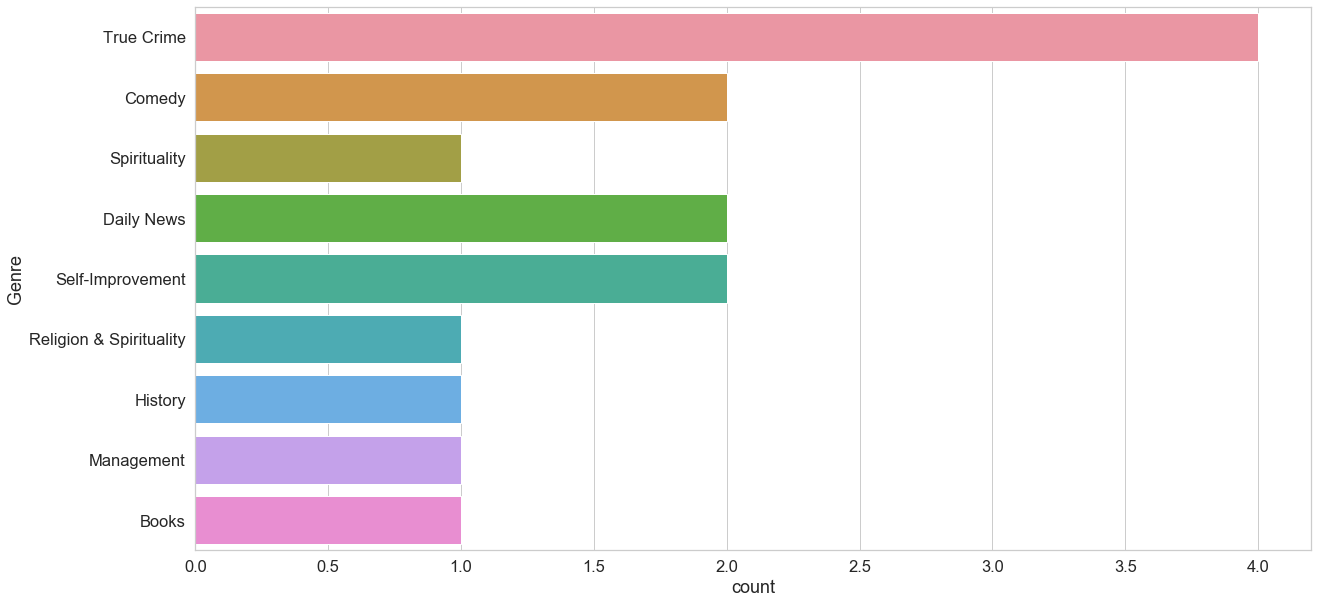

In [364]:
sns.countplot(y='Genre', data=cluster_3)

In [365]:
cluster_4 = podding[podding['labels'] == 4]
cluster_4.describe()

,ID,Tracks,Average Duration in Mins,Transformed_Genre,Transformed_Origin,Transformed_Rating,Rank,labels
count,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.0
mean,7.070332e+08,162.500000,37.092708,8.166667,0.166667,1.0,36.333333,4.0
std,9.605688e+07,129.146041,23.434843,8.841191,0.408248,0.0,15.055453,0.0
min,5.960475e+08,10.000000,13.464583,0.000000,0.000000,1.0,14.000000,4.0
25%,6.381096e+08,46.000000,22.008333,1.250000,0.000000,1.0,30.750000,4.0
50%,6.882817e+08,183.000000,33.656250,5.500000,0.000000,1.0,37.500000,4.0
75%,7.823356e+08,269.750000,42.076042,14.250000,0.000000,1.0,39.750000,4.0
max,8.345159e+08,300.000000,78.770833,21.000000,1.000000,1.0,60.000000,4.0


In [327]:
cluster_4['Origin'].value_counts()

Intl     5
Local    1
Name: Origin, dtype: int64

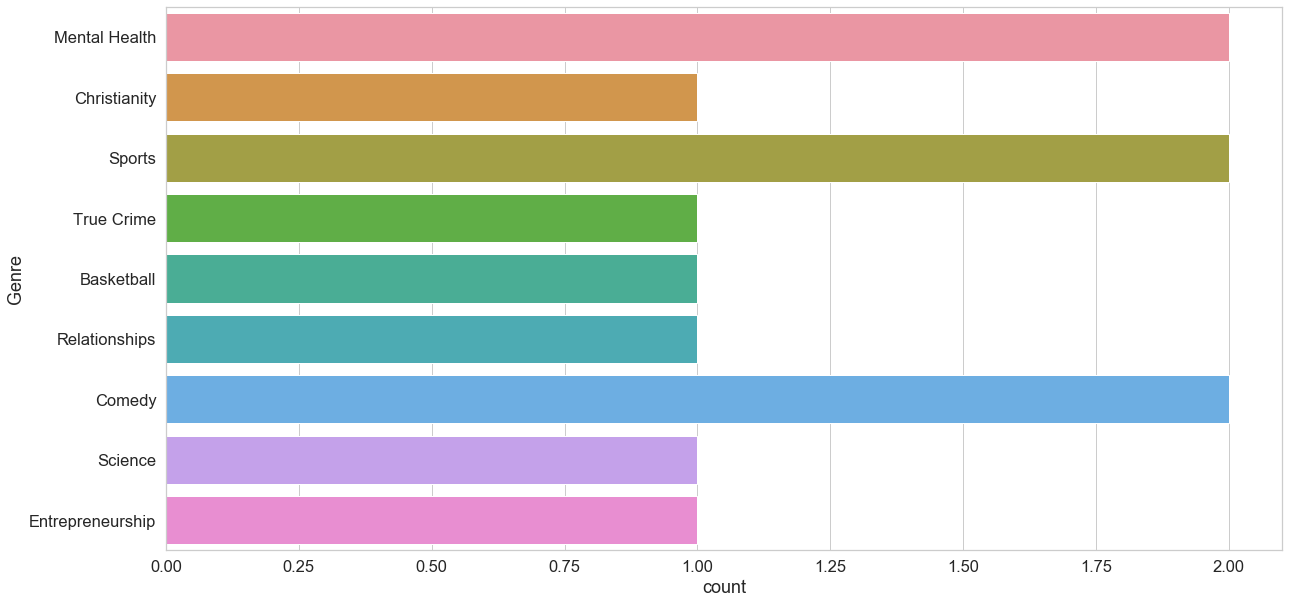

In [329]:
sns.countplot(y='Genre', data=cluster_0)